### Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import scipy as sc
from sklearn.preprocessing import StandardScaler
from pycaret.classification import setup, compare_models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

pd.set_option('display.max_rows', 150)
pd.set_option("display.max_columns", None)

In [2]:
train0 = pd.read_csv("./Data/train.csv")
test0 = pd.read_csv("./Data/test.csv")
train0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [3]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train0.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Combine Train and Test


In [5]:
train0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test0

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
target = train0['Survived']
test_ids = test0['PassengerId']

train1 = train0.drop(['PassengerId', 'Survived'], axis= 1)
test1 = test0.drop("PassengerId", axis= 1)

data1 = pd.concat([train1, test1], axis= 0)
data1

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
data2 = data1.copy()

In [9]:
data2.drop(["Name", "Ticket"], axis = 1, inplace = True)
data2

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,NaN,S
414,1,female,39.0,0,0,108.9000,C105,C
415,3,male,38.5,0,0,7.2500,NaN,S
416,3,male,NaN,0,0,8.0500,NaN,S


In [10]:
null_counts = data2.isna().sum()
null_counts = null_counts[null_counts > 0]
null_counts.reset_index()

,index,0
0,Age,263
1,Fare,1
2,Cabin,1014
3,Embarked,2


#### Filling numerical missing values

In [11]:
# all columns that have missing values
data2.columns[data2.isna().sum() > 0]

Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [12]:
# drop Cabin column
data2.drop("Cabin", inplace=True, axis= 1)

In [13]:
numeric_df = data2.select_dtypes(np.number)
numeric_df

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
413,3,NaN,0,0,8.0500
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500
416,3,NaN,0,0,8.0500


In [14]:
# impute [Age, Fare] using knn
def knn_impute (data, column):
    df = data.copy()
    numeric_df = df.select_dtypes(np.number)
    non_na_numeric_columns = numeric_df.loc[: , numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[column].isna() == False, column] # all the non NA values in that column
    X_train = numeric_df.loc[numeric_df[column].isna() == False, non_na_numeric_columns] # returns all the non NA values from all the non NA numeric columns
    X_test = numeric_df.loc[numeric_df[column].isna() == True, non_na_numeric_columns] # returns all the NA values rows in all the non NA numeric columns
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[numeric_df[column].isna() == True, column] = y_pred
    
    return df

In [15]:
data2.select_dtypes(np.number).columns[data2.select_dtypes(np.number).isna().sum() > 0]

Index(['Age', 'Fare'], dtype='object')

In [16]:
for i in ['Age', 'Fare']:
    data2 = knn_impute(data2, i)

In [17]:
data2.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

#### Filling Categorical Missing Values


In [18]:
data3 = data2.copy()

In [19]:
data3.select_dtypes("object").columns[data3.select_dtypes("object").isna().sum() > 0]

Index(['Embarked'], dtype='object')

In [20]:
# Impute using column mode
data3["Embarked"] = data3["Embarked"].fillna(data3["Embarked"].mode()[0])

In [21]:
data3.isna().sum().sum()

0

### Feature Transformation

In [22]:
data4 = data3.copy()

In [23]:
skewness_series = data4.select_dtypes(np.number).skew()
skewness_series

Pclass   -0.598647
Age       0.578923
SibSp     3.844220
Parch     3.669078
Fare      4.369599
dtype: float64

In [24]:
age_fig = px.histogram(data4, x="Age", nbins=50, title=f"Distribution of Age (Skewness: {skewness_series['Age']:.2f})")
age_fig.show()

In [25]:
fare_fig = px.histogram(data4, x= "Fare", nbins= 30, title=f"Distribution of Fare (Skewness: {skewness_series['Fare']:.2f})")
fare_fig.show()

In [26]:
data4["Age"] = np.log1p(data4["Age"])
data4["Fare"] = np.log1p(data4["Fare"])

In [27]:
skewness_series = data4.select_dtypes(np.number).skew()
skewness_series

Pclass   -0.598647
Age      -2.018281
SibSp     3.844220
Parch     3.669078
Fare      0.542157
dtype: float64

In [28]:
age_fig = px.histogram(data4, x="Age", nbins=50, title=f"Distribution of Age (Skewness: {skewness_series['Age']:.2f})")
age_fig.show()

In [29]:
fare_fig = px.histogram(data4, x= "Fare", nbins= 30, title=f"Distribution of Fare (Skewness: {skewness_series['Fare']:.2f})")
fare_fig.show()

### Encode Categorical Features

In [30]:
data5 = data4.copy()

In [31]:
data5 = pd.get_dummies(data5, dtype = "int")
data5

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,3.135494,1,0,2.110213,0,1,0,0,1
1,1,3.663562,1,0,4.280593,1,0,1,0,0
2,3,3.295837,0,0,2.188856,1,0,0,0,1
3,1,3.583519,1,0,3.990834,1,0,0,0,1
4,3,3.583519,0,0,2.202765,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,3.135494,0,0,2.202765,0,1,0,0,1
414,1,3.688879,0,0,4.699571,1,0,1,0,0
415,3,3.676301,0,0,2.110213,0,1,0,0,1
416,3,3.135494,0,0,2.202765,0,1,0,0,1


### Scaling

In [32]:
data6 = data5.copy()

In [33]:
scaler = StandardScaler()
scaler.fit(data6)
data6 = pd.DataFrame(scaler.transform(data6), index= data6.index, columns= data6.columns)
data6

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.841916,-0.201262,0.481288,-0.445000,-0.897977,-0.743497,0.743497,-0.50977,-0.32204,0.655011
1,-1.546098,0.658587,0.481288,-0.445000,1.344317,1.344995,-1.344995,1.96167,-0.32204,-1.526692
2,0.841916,0.059823,-0.479087,-0.445000,-0.816728,1.344995,-1.344995,-0.50977,-0.32204,0.655011
3,-1.546098,0.528254,0.481288,-0.445000,1.044957,1.344995,-1.344995,-0.50977,-0.32204,0.655011
4,0.841916,0.528254,-0.479087,-0.445000,-0.802359,-0.743497,0.743497,-0.50977,-0.32204,0.655011
...,...,...,...,...,...,...,...,...,...,...
413,0.841916,-0.201262,-0.479087,-0.445000,-0.802359,-0.743497,0.743497,-0.50977,-0.32204,0.655011
414,-1.546098,0.699812,-0.479087,-0.445000,1.777177,1.344995,-1.344995,1.96167,-0.32204,-1.526692
415,0.841916,0.679330,-0.479087,-0.445000,-0.897977,-0.743497,0.743497,-0.50977,-0.32204,0.655011
416,0.841916,-0.201262,-0.479087,-0.445000,-0.802359,-0.743497,0.743497,-0.50977,-0.32204,0.655011


### Spliting Data

In [34]:
data7 = data6.copy()

In [35]:
train_final = data7.loc[: train0.index.max(), :].copy()
test_final = data7.iloc[train0.index.max() + 1:, :].reset_index(drop= True).copy()
test_final  

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.841916,0.505480,-0.479087,-0.445000,-0.827878,-0.743497,0.743497,-0.50977,3.105202,-1.526692
1,0.841916,0.996685,0.481288,-0.445000,-0.929768,1.344995,-1.344995,-0.50977,-0.322040,0.655011
2,-0.352091,1.439473,-0.479087,-0.445000,-0.630538,-0.743497,0.743497,-0.50977,3.105202,-1.526692
3,0.841916,0.119040,-0.479087,-0.445000,-0.734701,-0.743497,0.743497,-0.50977,-0.322040,0.655011
4,0.841916,-0.201262,0.481288,0.710763,-0.405574,1.344995,-1.344995,-0.50977,-0.322040,0.655011
...,...,...,...,...,...,...,...,...,...,...
413,0.841916,-0.201262,-0.479087,-0.445000,-0.802359,-0.743497,0.743497,-0.50977,-0.322040,0.655011
414,-1.546098,0.699812,-0.479087,-0.445000,1.777177,1.344995,-1.344995,1.96167,-0.322040,-1.526692
415,0.841916,0.679330,-0.479087,-0.445000,-0.897977,-0.743497,0.743497,-0.50977,-0.322040,0.655011
416,0.841916,-0.201262,-0.479087,-0.445000,-0.802359,-0.743497,0.743497,-0.50977,-0.322040,0.655011


## Model Selection


In [36]:
_ = setup(data=pd.concat([train_final, target], axis= 1), target= "Survived")

,Description,Value
0,Session id,7388
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 11)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [37]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8314,0.8856,0.7404,0.8123,0.7722,0.6389,0.6432,0.0280
catboost,CatBoost Classifier,0.8282,0.8833,0.7149,0.8164,0.7600,0.6272,0.6327,0.7890
xgboost,Extreme Gradient Boosting,0.8218,0.8738,0.7361,0.7893,0.7602,0.6187,0.6213,0.0540
lr,Logistic Regression,0.8185,0.8779,0.7319,0.7898,0.7552,0.6116,0.6175,0.9080
ridge,Ridge Classifier,0.8169,0.0000,0.7275,0.7868,0.7518,0.6074,0.6129,0.0090
lightgbm,Light Gradient Boosting Machine,0.8169,0.8767,0.7359,0.7808,0.7548,0.6090,0.6129,0.0680
knn,K Neighbors Classifier,0.8153,0.8691,0.7109,0.7950,0.7475,0.6027,0.6079,0.7280
lda,Linear Discriminant Analysis,0.8153,0.8787,0.7275,0.7842,0.7502,0.6043,0.6102,0.0110
rf,Random Forest Classifier,0.8122,0.8716,0.7194,0.7758,0.7458,0.5972,0.5990,0.0450
ada,Ada Boost Classifier,0.8073,0.8505,0.7400,0.7584,0.7475,0.5919,0.5937,0.0260


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=7388, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Baseline Model

In [38]:
baseline_model = GradientBoostingClassifier()

In [39]:
baseline_model.fit(train_final, target)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Evaluation

In [40]:
kf = KFold(n_splits = 10)
results = cross_val_score(baseline_model, train_final, target, scoring= "accuracy", cv = kf)

In [41]:
results

array([0.77777778, 0.82022472, 0.80898876, 0.85393258, 0.84269663,
       0.82022472, 0.82022472, 0.78651685, 0.87640449, 0.83146067])

<Figure size 1000x1000 with 0 Axes>

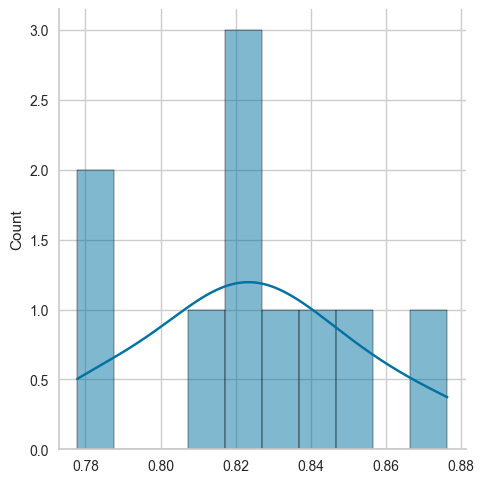

In [42]:
plt.figure(figsize=(10, 10))
sns.displot(results, kde= True, bins = 10)

## Make Submission

In [43]:
sample_submission = pd.read_csv("./Data/gender_submission.csv")
sample_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
test0["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [45]:
test_final

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.841916,0.505480,-0.479087,-0.445000,-0.827878,-0.743497,0.743497,-0.50977,3.105202,-1.526692
1,0.841916,0.996685,0.481288,-0.445000,-0.929768,1.344995,-1.344995,-0.50977,-0.322040,0.655011
2,-0.352091,1.439473,-0.479087,-0.445000,-0.630538,-0.743497,0.743497,-0.50977,3.105202,-1.526692
3,0.841916,0.119040,-0.479087,-0.445000,-0.734701,-0.743497,0.743497,-0.50977,-0.322040,0.655011
4,0.841916,-0.201262,0.481288,0.710763,-0.405574,1.344995,-1.344995,-0.50977,-0.322040,0.655011
...,...,...,...,...,...,...,...,...,...,...
413,0.841916,-0.201262,-0.479087,-0.445000,-0.802359,-0.743497,0.743497,-0.50977,-0.322040,0.655011
414,-1.546098,0.699812,-0.479087,-0.445000,1.777177,1.344995,-1.344995,1.96167,-0.322040,-1.526692
415,0.841916,0.679330,-0.479087,-0.445000,-0.897977,-0.743497,0.743497,-0.50977,-0.322040,0.655011
416,0.841916,-0.201262,-0.479087,-0.445000,-0.802359,-0.743497,0.743497,-0.50977,-0.322040,0.655011


In [46]:
final_predictions = baseline_model.predict(test_final)

In [47]:
final_predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
submission = pd.concat([test0["PassengerId"], pd.Series(final_predictions, name="Survived")], axis= 1)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
sample_submission.shape

(418, 2)

In [50]:
submission.shape

(418, 2)

In [51]:
submission.to_csv("./submission.csv", header= True, index= False)

In [52]:
!python --version

Python 3.11.4


In [53]:
import joblib

# Save model
joblib.dump(baseline_model, "gradient_boosting_model.pkl")

# Load model (to verify)
model = joblib.load("gradient_boosting_model.pkl")


In [ ]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [56]:
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump((scaler, data6.columns.tolist()), f)
